In [1]:
import numpy as np
from matplotlib import pyplot as plt

#计算所有城市之间的距离
def distancing(citys):
    N = len(citys)
    distance = np.zeros((N, N))
    for i, this_city in enumerate(citys):
        temp = []
        [temp.append(np.linalg.norm(np.array(this_city) - np.array(city))) if i != j else temp.append(0.0) for j, city in enumerate(citys)]
        distance[i] = temp
    return distance

# 电压对时间求导
def deri_V(V, distance):
    lie = np.sum(V, axis=0) - 1  # 按列相加
    hang = np.sum(V, axis=1) - 1  # 按行相加
    first = np.zeros((N, N))
    second = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            first[i, j] = lie[j]
    for i in range(N):
        for j in range(N):
            second[j, i] = hang[j]
    # 将第一列移动到最后一列
    cone = V[:, 1:N]
    czero = np.zeros((N, 1))
    czero[:, 0] = V[:, 0]
    c = np.concatenate((cone, czero), axis=1)
    c = np.dot(distance, c)
    return -A * (first + second) - D * c

# 计算能量
def get_energy(V, distance):
    first = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    second = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    id_ = [i for i in range(1, N)]
    id_  = id_  + [0]
    Vt = V[:, id_ ]
    third = distance * Vt
    third = np.sum(np.sum(np.multiply(V, third)))
    energy = 0.5 * (A * (first + second) + D * third)
    return energy


# 可视化
def Hamilton(citys,path):
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.2, color='blue')
        p2 = plt.Circle(citys[to_], 0.2, color='blue')
        plt.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='blue')
        plt.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=15)
    plt.axis('equal')
    plt.grid()
    plt.show()
    
def Energys(energys):
    plt.plot(np.arange(0, len(energys), 1), energys, color='red')
    plt.show()


Bad key "text.kerning_factor" on line 4 in
D:\Zstudy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
citys = np.array([[1,2], [1,4], [2,3], [3,2], [4,5], [5, 4], [6, 4], [6,5]])

N = len(citys)
# 设置初始值
A = N * N
D = N / 2
U0 = 0.001  # 初始电压
step = 0.0001  # 步长
num_iter = 10000  # 迭代次数

distance = distancing(citys)

# 初始化神经网络的输入状态（电路的输入电压U）
U = 1 / 2 * U0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1)

# 初始化神经网络的输出状态（电路的输出电压V）
V = 1 / 2 * (1 + np.tanh(U / U0))

energys = np.array([0.0 for x in range(num_iter)])  # 每次迭代的能量
best_distance = np.inf  # 最优距离
best_route = []  # 最优路线
H_path = []  # 哈密顿回路

for n in range(num_iter):
    # 计算du/dt
    du = deri_V(V, distance)
    # 由一阶欧拉法更新下一个时间的输入状态（电路的输入电压U）
    U = U + du * step
    # 由sigmoid函数更新下一个时间的输出状态（电路的输出电压V）
    V = 1 / 2 * (1 + np.tanh(U / U0))
    # 计算当前网络的能量E
    energys[n] = get_energy(V, distance)
    # 检查路径
    new = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                new[j, i] = 1
                route += [j]
                break
    if len(np.unique(route)) == N:
        route.append(route[0])
        dis = 0.0
        for i in range(len(route) - 1):
            dis += distance[route[i]][route[i+1]]
        if dis < best_distance:
            H_path = []
            best_distance = dis
            best_route = route
            [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
            print('在第{}次迭代进行了更新，此时最优解距离为：{}，能量为：{}，路径为：'.format(n, best_distance, energys[n]))
            [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]

在第116次迭代进行了更新，此时最优解距离为：23.585222823491943，能量为：141.81990092444295，路径为：
e,a,g,h,c,b,d,f,e
在第148次迭代进行了更新，此时最优解距离为：22.848005547048654，能量为：180.60062402806028，路径为：
d,a,g,h,c,b,f,e,d
在第452次迭代进行了更新，此时最优解距离为：21.204296716795266，能量为：175.0386038476039，路径为：
e,h,g,a,c,b,f,d,e
在第708次迭代进行了更新，此时最优解距离为：17.40615530295805，能量为：293.9826719078372，路径为：
g,h,b,a,c,d,f,e,g
在第1279次迭代进行了更新，此时最优解距离为：16.528023972905327，能量为：269.67049165216133，路径为：
d,a,b,c,g,h,f,e,d
在第1625次迭代进行了更新，此时最优解距离为：16.46284073991415，能量为：254.64255471004992，路径为：
d,a,b,c,h,g,f,e,d
在第1690次迭代进行了更新，此时最优解距离为：15.647559034406951，能量为：283.14823261487254，路径为：
b,a,c,d,h,g,f,e,b
在第4588次迭代进行了更新，此时最优解距离为：15.469413449533647，能量为：68.14758165910355，路径为：
b,e,g,h,f,d,c,a,b
在第7982次迭代进行了更新，此时最优解距离为：14.819131909660761，能量为：304.10905552203684，路径为：
e,h,g,f,d,c,a,b,e


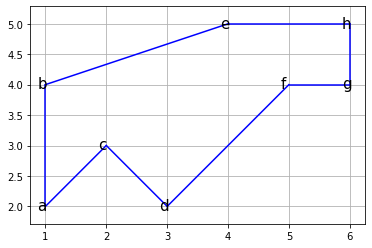

In [3]:
Hamilton(citys, H_path)

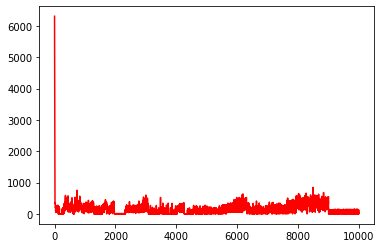

In [4]:
Energys(energys)